

```
Author ===> Jhanvi Shah
GitHub ===> @Jhanvi2001
Charotar University Of Science and Technology, CSPIT
Anand, Gujarat, India.
```



## **0. Libraries**

In [2]:
# Libraries/Modules for Phase 1
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Library/Modules for phase 2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Libraries for phase 3
import numpy as np
import matplotlib.pyplot as plt

# Library/Module for phase 4
from keras.preprocessing import image

## **1. Loading Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
""" Providing training-testing directory path """

train_data_path = '/content/drive/MyDrive/Dataset/LivDet 2015/Digital_Persona/Training/' # training directory path
test_data_path = '/content/drive/MyDrive/Dataset/LivDet 2015/Digital_Persona/Testing/' # testing directory path

""" 
    assigning object of sequential class 
    here sequtial is model type imported from keras

"""

model = Sequential()


In [5]:
""" 
    Rescaling data/images using ImageDataGenerator class.
    Loading all data/images in (128,128) size and in total 16 batches.
    Two categories: Live and Fake to classify input data/image.

"""

# rescaling and loading training data
train_data = ImageDataGenerator(rescale=1.0/255) 
train_set = train_data.flow_from_directory(directory=train_data_path, target_size=(128,128), batch_size=16, color_mode='rgb', class_mode='binary') 

# rescaling and loading testing data
test_data = ImageDataGenerator(rescale=1.0/255) # rescaling
test_set = test_data.flow_from_directory(directory=test_data_path, target_size=(128,128), batch_size=16, color_mode='rgb', class_mode='binary') 


Found 2010 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## **2. Convolutional Neural Network**

In [6]:
""" 1. First Layer """

model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [7]:
""" 2. Second Layer """

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [8]:
""" 3. Third Layer """

model.add(Conv2D(256,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
""" 4. Flatten Layer """

model.add(Flatten())


In [10]:
""" 5. Dense Layer """

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [12]:
""" Compiling the model """

# using Adam optimizer and getting performace metric based on accuracy as a parameter
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

# fitting data/images to model with total 30 epochs
model_history = model.fit(train_set, validation_data=test_set, epochs=20) 


Epoch 1/20
126/126 [==============================] - 261s 2s/step - loss: 0.5967 - accuracy: 0.6582 - val_loss: 0.6927 - val_accuracy: 0.6436
Epoch 2/20
126/126 [==============================] - 116s 919ms/step - loss: 0.4036 - accuracy: 0.8134 - val_loss: 0.4377 - val_accuracy: 0.7936
Epoch 3/20
126/126 [==============================] - 116s 922ms/step - loss: 0.2615 - accuracy: 0.8920 - val_loss: 0.4788 - val_accuracy: 0.7832
Epoch 4/20
126/126 [==============================] - 117s 927ms/step - loss: 0.1988 - accuracy: 0.9209 - val_loss: 0.5355 - val_accuracy: 0.8224
Epoch 5/20
126/126 [==============================] - 116s 921ms/step - loss: 0.2229 - accuracy: 0.9080 - val_loss: 0.4493 - val_accuracy: 0.8160
Epoch 6/20
126/126 [==============================] - 119s 943ms/step - loss: 0.1103 - accuracy: 0.9572 - val_loss: 0.5072 - val_accuracy: 0.8216
Epoch 7/20
126/126 [==============================] - 117s 928ms/step - loss: 0.0784 - accuracy: 0.9716 - val_loss: 0.6248 - va

## **3. Performance Analysis**

In [13]:
plt.style.use('ggplot') # using ggplot (grammer of graphics) style to draw figures.
plt.figure

<function matplotlib.pyplot.figure>

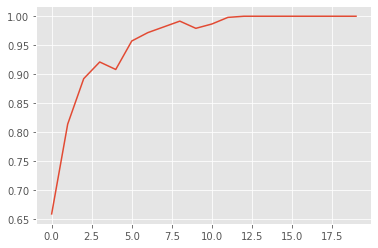

In [14]:
""" 
    Drawing graph: Loss/Accuracy vs. Number of epochs
    < Training History >
"""

plt.plot(np.arange(0,20), model_history.history['accuracy'], label='train_acc')

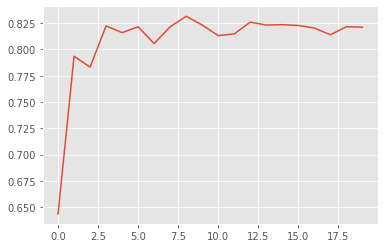

In [15]:
""" 
    Drawing graph: Loss/Accuracy vs. Number of epochs
    < Validation/Testing History >
"""

plt.plot(np.arange(0,20), model_history.history['val_accuracy'], label='val_accuracy')

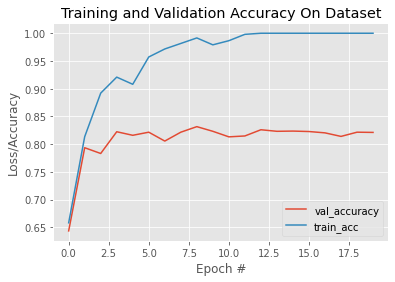

In [16]:
""" 
    Drawing graph: Loss/Accuracy vs. Number of epochs
    < Training History + Validation/Testing History >
"""

plt.title('Training and Validation Accuracy On Dataset')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.plot(np.arange(0,20), model_history.history['val_accuracy'], label='val_accuracy') # validation/testing measures
plt.plot(np.arange(0,20), model_history.history['accuracy'], label='train_acc') # training measures
plt.legend(loc='lower right') # setting legend to lower right position

In [17]:
import statistics
print(statistics.mean(model_history.history['val_accuracy']))

0.808160001039505


## **4. Testing Phase**

In [19]:
""" loading test image with (128,128) dimension """

test_image_path = '/content/drive/MyDrive/Dataset/GitHub_Dataset/testing/Live/10_5.png'
test_image = image.load_img(test_image_path, target_size=(128,128)) # test image
test_image = image.img_to_array(test_image) # converting image to array
test_image = np.expand_dims(test_image, axis=0) # expanding shape of an array
result = model.predict(test_image) # giving test_image array to model for prediction
train_set.class_indices # checking class indices- Fake:0, Live:1

{'Fake': 0, 'Live': 1}

In [20]:
""" finding test image category by comapring class indices """

if result[0][0]==1:
  prediction = 'Live'
else:
  prediction = 'Fake'

print('Input image category: ',prediction)

Input image category:  Live
